# Predicting Particulate Matter (PM2.5) Concentrations in the Air of China

## Exploring Chengdu Data

In [68]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
#from sklearn.cross_validation import train_test_split

# Pretty display for notebooks
%matplotlib inline

import os
print(os.listdir("../China/China_dataset"))

# Load Beijing dataset
dataset_Chengdu = pd.read_csv('../China/China_dataset/Chengdu.csv', parse_dates={'date' : ['year', 'month', 'day']})

display(dataset_Chengdu.head(n=3))
display(dataset_Chengdu.info())

dataset_Chengdu['year'] = dataset_Chengdu['date'].dt.year   
dataset_Chengdu['month'] = dataset_Chengdu['date'].dt.month
dataset_Chengdu['day'] = dataset_Chengdu['date'].dt.strftime('%w').astype(int)
#print(dataset_Chengdu["day"].value_counts())
# day_type: 1 if the day weekend, 0 if the day weekday
dataset_Chengdu['day_Type'] = dataset_Chengdu['day'].apply(lambda x: 'Weekends' if x >= 5 else 'Weekdays').astype('category')


dataset_Chengdu = dataset_Chengdu.drop('date', axis=1)

# Success - Display the first five records
display(dataset_Chengdu.head(n=3))
display(dataset_Chengdu.info())

# Total number of records
n_records = len(dataset_Chengdu["PM_US Post"])

# Print the results
print("Total number of records: {}".format(n_records))

['Beijing.csv', 'Chengdu.csv', 'Guangzhou.csv', 'Shanghai.csv', 'Shenyang.csv']


,date,No,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind
0,2010-01-01,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0,1.0
1,2010-01-01,2,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0,0.0
2,2010-01-01,3,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 16 columns):
date             52584 non-null datetime64[ns]
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Caotangsi     24420 non-null float64
PM_Shahepu       24594 non-null float64
PM_US Post       28900 non-null float64
DEWP             52055 non-null float64
HUMI             52049 non-null float64
PRES             52063 non-null float64
TEMP             52057 non-null float64
cbwd             52063 non-null object
Iws              52051 non-null float64
precipitation    49629 non-null float64
Iprec            49629 non-null float64
new_wind         52051 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(3), object(1)
memory usage: 6.4+ MB


None

,No,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind,year,month,day,day_Type
0,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0,1.0,2010,1,5,Weekends
1,2,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0,0.0,2010,1,5,Weekends
2,3,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0,0.0,2010,1,5,Weekends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 19 columns):
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Caotangsi     24420 non-null float64
PM_Shahepu       24594 non-null float64
PM_US Post       28900 non-null float64
DEWP             52055 non-null float64
HUMI             52049 non-null float64
PRES             52063 non-null float64
TEMP             52057 non-null float64
cbwd             52063 non-null object
Iws              52051 non-null float64
precipitation    49629 non-null float64
Iprec            49629 non-null float64
new_wind         52051 non-null float64
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
day_Type         52584 non-null category
dtypes: category(1), float64(11), int64(6), object(1)
memory usage: 7.3+ MB


None

Total number of records: 52584


## Assessing Chengdu Data

- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan
- Convert Season to categorical 
- Year ? 
- Fix Hour values
- Remove records before 2013
- Add a city column
- Fix outliers in columns: PM_US Post, HUMI, TEMP, Iws, DEWP, precipitation, Iprec
- Remove missing values
- Convert Numerical to categorical data

## Cleaning Chengdu Data

In [69]:
# First make copies for cleaning
dataset_Chengdu_clean = dataset_Chengdu.copy()

In [70]:
#Drop columns: row, 'PM_Caotangsi', 'PM_Shahepu'
Unneeded_Columns = ['No', 'PM_Caotangsi', 'PM_Shahepu', 'Iprec', 'Iws']
dataset_Chengdu_clean = dataset_Chengdu_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Chengdu_clean.head(n=2))
display(dataset_Chengdu_clean.describe())


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
0,0,4,NaN,4.0,81.20,1022.0,7.0,cv,0.0,1.0,2010,1,5,Weekends
1,1,4,NaN,4.0,86.99,1022.0,6.0,cv,0.0,0.0,2010,1,5,Weekends


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,52584.000000,52584.000000,28900.000000,52055.000000,52049.000000,52063.000000,52057.000000,49629.000000,52051.000000,52584.000000,52584.000000,52584.000000
mean,11.500000,2.491100,83.407612,12.274556,73.224697,1014.621985,17.698158,0.107161,1.572432,2012.499772,6.523962,3.000000
std,6.922252,1.116988,57.239585,7.531846,17.819088,8.111353,7.843607,1.023369,1.285344,1.707485,3.448452,2.000019
min,0.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-3.000000,0.000000,0.000000,2010.000000,1.000000,0.000000
25%,5.750000,1.000000,44.000000,6.000000,61.440000,1008.000000,11.000000,0.000000,1.000000,2011.000000,4.000000,1.000000
50%,11.500000,2.000000,68.000000,13.000000,77.010000,1014.900000,18.000000,0.000000,1.000000,2012.000000,7.000000,3.000000
75%,17.250000,3.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,0.000000,2.000000,2014.000000,10.000000,5.000000
max,23.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,57.000000,12.000000,2015.000000,12.000000,6.000000


In [71]:
# Remove records before 2013
dataset_Chengdu_clean = dataset_Chengdu_clean.drop(dataset_Chengdu_clean[dataset_Chengdu_clean.year < 2013].index)

print("Total number of records after removing years before 2013: ", len(dataset_Chengdu_clean))


print('The statistical summary of air quality data in Chengdu')
display(np.round(dataset_Chengdu_clean.describe(), 3))

print('The information summary of air quality data in Chengdu')
display(dataset_Chengdu_clean.info())

Total number of records after removing years before 2013:  26280
The statistical summary of air quality data in Chengdu


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,26280.000,26280.000,24491.000,25793.000,25791.000,25797.000,25795.000,25188.000,25785.000,26280.000,26280.000,26280.000
mean,11.500,2.490,83.123,12.360,71.783,1014.732,18.167,0.113,1.582,2014.000,6.526,3.000
std,6.922,1.117,58.168,7.366,18.384,8.125,7.701,1.058,1.273,0.817,3.448,1.998
min,0.000,1.000,1.000,-16.000,12.780,991.000,-3.000,0.000,0.000,2013.000,1.000,0.000
25%,5.750,1.000,43.000,6.000,59.290,1008.000,12.000,0.000,1.000,2013.000,4.000,1.000
50%,11.500,2.000,67.000,13.000,75.490,1015.000,19.000,0.000,1.000,2014.000,7.000,3.000
75%,17.250,3.000,105.000,19.000,87.280,1021.000,24.000,0.000,2.000,2015.000,10.000,5.000
max,23.000,4.000,688.000,28.000,100.000,1041.000,38.000,51.700,12.000,2015.000,12.000,6.000


The information summary of air quality data in Chengdu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 26304 to 52583
Data columns (total 14 columns):
hour             26280 non-null int64
season           26280 non-null int64
PM_US Post       24491 non-null float64
DEWP             25793 non-null float64
HUMI             25791 non-null float64
PRES             25797 non-null float64
TEMP             25795 non-null float64
cbwd             25797 non-null object
precipitation    25188 non-null float64
new_wind         25785 non-null float64
year             26280 non-null int64
month            26280 non-null int64
day              26280 non-null int64
day_Type         26280 non-null category
dtypes: category(1), float64(7), int64(5), object(1)
memory usage: 2.8+ MB


None

In [72]:
dataset_Chengdu_clean = dataset_Chengdu_clean[pd.notnull(dataset_Chengdu_clean['PM_US Post'])]
print("Total number of records after removing missing values in PM 2.5: ", len(dataset_Chengdu_clean))


Total number of records after removing missing values in PM 2.5:  24491


In [73]:
# Convert Season to categorical
dataset_Chengdu_clean.season = dataset_Chengdu_clean.season.astype('category')
dataset_Chengdu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24491 entries, 26304 to 52583
Data columns (total 14 columns):
hour             24491 non-null int64
season           24491 non-null category
PM_US Post       24491 non-null float64
DEWP             24004 non-null float64
HUMI             24002 non-null float64
PRES             24008 non-null float64
TEMP             24006 non-null float64
cbwd             24008 non-null object
precipitation    23598 non-null float64
new_wind         23996 non-null float64
year             24491 non-null int64
month            24491 non-null int64
day              24491 non-null int64
day_Type         24491 non-null category
dtypes: category(2), float64(7), int64(4), object(1)
memory usage: 2.5+ MB


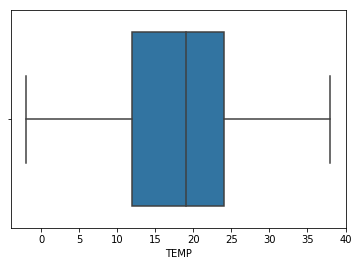

In [74]:
# Fix outliers in columns: HUMI, TEMP, Iws and DEWP
# In statistics, an outlier is an observation point that is distant from other observations.
# Discover outliers with visualization tools
import seaborn as sns
sns.boxplot(x=dataset_Chengdu_clean['TEMP'])


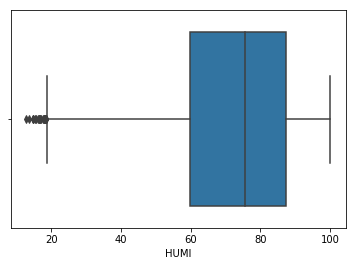

In [75]:
sns.boxplot(x=dataset_Chengdu_clean['HUMI'])


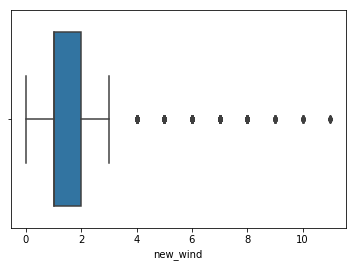

In [76]:
sns.boxplot(x=dataset_Chengdu_clean['new_wind'])


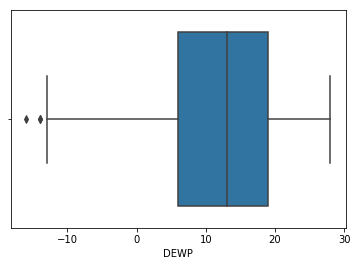

In [77]:
sns.boxplot(x=dataset_Chengdu_clean['DEWP'])

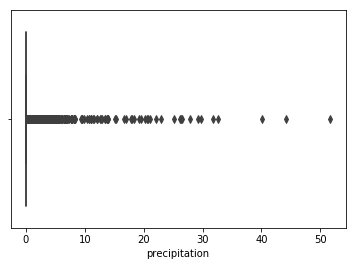

In [78]:
sns.boxplot(x=dataset_Chengdu_clean['precipitation'])

In [79]:
#sns.boxplot(x=dataset_Chengdu_clean['Iprec'])

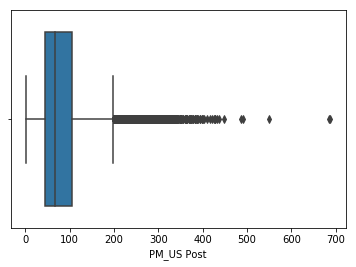

In [80]:
sns.boxplot(x=dataset_Chengdu_clean['PM_US Post'])

In [81]:
Q1 = dataset_Chengdu_clean.quantile(0.25)
Q3 = dataset_Chengdu_clean.quantile(0.75)
IQR = Q3 - Q1
L = IQR + Q3

print(IQR)
print('--')
print(L)

hour             13.00
PM_US Post       62.00
DEWP             13.00
HUMI             27.41
PRES             13.00
TEMP             12.00
precipitation     0.00
new_wind          1.00
year              2.00
month             5.00
day               4.00
dtype: float64
--
hour               31.0
PM_US Post        167.0
DEWP               32.0
HUMI              114.6
PRES             1034.0
TEMP               36.0
precipitation       0.0
new_wind            3.0
year             2017.0
month              14.0
day                 9.0
dtype: float64


In [82]:
# Check tempreture 
(dataset_Chengdu_clean[dataset_Chengdu_clean.DEWP < -12])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
43439,23,4,22.0,-14.0,18.07,1037.0,9.0,NE,0.0,5.0,2014,12,1,Weekdays
43440,0,4,17.0,-16.0,16.39,1037.0,8.0,NE,0.0,5.0,2014,12,2,Weekdays
43441,1,4,19.0,-14.0,19.34,1038.0,8.0,NE,0.0,4.0,2014,12,2,Weekdays
43442,2,4,17.0,-13.0,22.46,1038.0,7.0,NE,0.0,3.0,2014,12,2,Weekdays
43444,4,4,23.0,-13.0,22.46,1038.0,7.0,NE,0.0,4.0,2014,12,2,Weekdays


In [83]:
# Check tempreture 
(dataset_Chengdu_clean[dataset_Chengdu_clean.HUMI < 20])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
26869,13,4,101.0,-7.0,19.92,1025.0,16.0,NE,0.0,3.0,2013,1,4,Weekdays
27732,12,1,97.0,-10.0,15.76,1018.0,16.0,NE,0.0,4.0,2013,3,5,Weekends
27733,13,1,90.0,-10.0,14.79,1017.0,17.0,NE,0.0,4.0,2013,3,5,Weekends
27734,14,1,84.0,-10.0,14.79,1016.0,17.0,NE,0.0,5.0,2013,3,5,Weekends
27735,15,1,78.0,-10.0,14.79,1016.0,17.0,NE,0.0,5.0,2013,3,5,Weekends
27736,16,1,89.0,-9.0,18.18,1016.0,15.0,NE,0.0,5.0,2013,3,5,Weekends
27737,17,1,90.0,-9.0,18.18,1016.0,15.0,NE,0.0,5.0,2013,3,5,Weekends
27738,18,1,95.0,-8.0,19.66,1017.0,15.0,NE,0.0,5.0,2013,3,5,Weekends
27855,15,1,96.0,-3.0,15.50,1018.0,25.0,NE,0.0,6.0,2013,3,3,Weekdays
27856,16,1,98.0,-1.0,17.97,1018.0,25.0,NE,0.0,5.0,2013,3,3,Weekdays


In [84]:
# Check wind speed 
(dataset_Chengdu_clean[dataset_Chengdu_clean.new_wind > 4])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
26344,16,4,126.0,-5.0,36.74,1021.0,9.0,NE,0.0,5.0,2013,1,3,Weekdays
26347,19,4,56.0,-3.0,45.70,1027.0,8.0,NE,0.0,5.0,2013,1,3,Weekdays
26348,20,4,58.0,-3.0,45.70,1028.0,8.0,NE,0.0,6.0,2013,1,3,Weekdays
26349,21,4,67.0,-2.0,52.70,1030.0,7.0,NE,0.0,5.0,2013,1,3,Weekdays
26350,22,4,65.0,-2.0,52.70,1031.0,7.0,NE,0.0,5.0,2013,1,3,Weekdays
26352,0,4,70.0,0.0,75.14,1033.0,4.0,NW,0.0,5.0,2013,1,4,Weekdays
26354,2,4,60.0,-2.0,64.90,1033.0,4.0,NE,0.0,5.0,2013,1,4,Weekdays
26366,14,4,68.0,-5.0,51.84,1029.0,4.0,NE,0.0,5.0,2013,1,4,Weekdays
26367,15,4,70.0,-5.0,51.84,1028.0,4.0,NE,0.0,5.0,2013,1,4,Weekdays
26441,17,4,86.0,0.0,70.06,1021.0,5.0,NE,0.0,5.0,2013,1,0,Weekdays


In [85]:
(dataset_Chengdu_clean[dataset_Chengdu_clean['PM_US Post'] > 300]).sort_values(by = 'PM_US Post', ascending=False)


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
35784,0,4,688.0,5.0,87.09,1015.0,7.0,cv,0.0,0.0,2014,1,5,Weekends
35785,1,4,685.0,6.0,93.35,1014.0,7.0,cv,0.0,1.0,2014,1,5,Weekends
35786,2,4,549.0,6.0,93.35,1014.0,7.0,SW,0.0,1.0,2014,1,5,Weekends
35790,6,4,491.0,7.0,93.40,1012.0,8.0,cv,0.0,0.0,2014,1,5,Weekends
27264,0,4,487.0,2.0,70.47,1023.0,7.0,SW,0.0,2.0,2013,2,0,Weekdays
35796,12,4,449.0,8.0,87.38,1013.0,10.0,cv,0.0,0.0,2014,1,5,Weekends
33128,8,3,436.0,18.0,88.28,1013.0,20.0,cv,0.0,1.0,2013,10,6,Weekends
35795,11,4,433.0,8.0,93.45,1014.0,9.0,cv,0.0,0.0,2014,1,5,Weekends
33129,9,3,428.0,19.0,78.24,1014.0,23.0,cv,0.0,1.0,2013,10,6,Weekends
35791,7,4,427.0,7.0,87.28,1012.0,9.0,cv,0.0,0.0,2014,1,5,Weekends


In [86]:
(dataset_Chengdu_clean[dataset_Chengdu_clean['precipitation'] > 50])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
31539,3,2,11.0,25.0,100.0,1001.0,25.0,NW,51.7,2.0,2013,8,3,Weekdays


In [87]:
# Removing PM_US Post Outliers 
dataset_Chengdu_clean = dataset_Chengdu_clean.drop(dataset_Chengdu_clean[dataset_Chengdu_clean['precipitation'] > 50].index)


In [88]:

print("dataset_Beijing_clean lenght after removing outliers: ", len(dataset_Chengdu_clean))
dataset_Chengdu_clean.describe()

dataset_Beijing_clean lenght after removing outliers:  24490


,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,24490.000000,24490.000000,24003.000000,24001.000000,24007.000000,24005.000000,23597.000000,23995.000000,24490.000000,24490.000000,24490.000000
mean,11.507758,83.126011,12.365371,71.952967,1014.815804,18.115893,0.112773,1.570911,2014.052389,6.536178,2.996080
std,6.939890,58.166898,7.421830,18.150690,8.110022,7.782650,1.015807,1.263917,0.806984,3.472040,2.003811
min,0.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,0.000000,0.000000,2013.000000,1.000000,0.000000
25%,5.000000,43.000000,6.000000,59.780000,1008.000000,12.000000,0.000000,1.000000,2013.000000,4.000000,1.000000
50%,12.000000,67.000000,13.000000,75.670000,1015.000000,19.000000,0.000000,1.000000,2014.000000,7.000000,3.000000
75%,18.000000,105.000000,19.000000,87.190000,1021.000000,24.000000,0.000000,2.000000,2015.000000,9.000000,5.000000
max,23.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,44.200000,11.000000,2015.000000,12.000000,6.000000


In [89]:
# drop rows with missing values
dataset_Chengdu_clean = dataset_Chengdu_clean.dropna(axis=0, how="any")
print("dataset_Chengdu_clean lenght after removing missing values: ", len(dataset_Chengdu_clean))


dataset_Chengdu_clean lenght after removing missing values:  23097


In [90]:
# Convert month and hour Features to Cyclical Features
dataset_Chengdu_clean['hour_sin'] = np.sin(dataset_Chengdu_clean.hour*(2.*np.pi/24))
dataset_Chengdu_clean['hour_cos'] = np.cos(dataset_Chengdu_clean.hour*(2.*np.pi/24))
dataset_Chengdu_clean['month_sin'] = np.sin((dataset_Chengdu_clean.month-1)*(2.*np.pi/12))
dataset_Chengdu_clean['month_cos'] = np.cos((dataset_Chengdu_clean.month-1)*(2.*np.pi/12))
dataset_Chengdu_clean['day_sin'] = np.sin(dataset_Chengdu_clean.day*(2.*np.pi/7))
dataset_Chengdu_clean['day_cos'] = np.cos(dataset_Chengdu_clean.day*(2.*np.pi/7))

# Drop the original features : season, month, day and hour 
#Unneeded_Columns = ['month', 'hour', 'day']
#dataset_Chengdu_clean = dataset_Chengdu_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Chengdu_clean.head(n=1))



,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
26304,0,4,129.0,-4.0,64.42,1022.0,2.0,cv,0.0,1.0,2013,1,2,Weekdays,0.0,1.0,0.0,1.0,0.974928,-0.222521


In [91]:
# One-hot encode the data using pandas.get_dummies() to convert the non-numeric feature to numeric feature
#dataset_Beijing_clean.month = dataset_Beijing_clean.month.astype('category')
dataset_Chengdu_clean = pd.get_dummies(dataset_Chengdu_clean)


In [92]:
# Rename day type columns 
dataset_Chengdu_clean.rename(columns={"day_Type_Weekdays": "Weekdays", "day_Type_Weekends": "Weekends"}, inplace=True)


In [93]:
dataset_Chengdu_clean.head()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
26304,0,129.0,-4.0,64.42,1022.0,2.0,0.0,1.0,2013,1,...,0,0,1,0,0,0,0,1,1,0
26305,1,135.0,-3.0,80.19,1022.0,0.0,0.0,0.0,2013,1,...,0,0,1,0,0,0,0,1,1,0
26316,12,189.0,-5.0,42.10,1020.0,7.0,0.0,2.0,2013,1,...,0,0,1,1,0,0,0,0,1,0
26317,13,132.0,-9.0,26.99,1018.0,9.0,0.0,1.0,2013,1,...,0,0,1,0,0,0,1,0,1,0
26318,14,100.0,-8.0,27.29,1017.0,10.0,0.0,1.0,2013,1,...,0,0,1,0,0,0,1,0,1,0


In [94]:
dataset_Chengdu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23097 entries, 26304 to 52583
Data columns (total 28 columns):
hour             23097 non-null int64
PM_US Post       23097 non-null float64
DEWP             23097 non-null float64
HUMI             23097 non-null float64
PRES             23097 non-null float64
TEMP             23097 non-null float64
precipitation    23097 non-null float64
new_wind         23097 non-null float64
year             23097 non-null int64
month            23097 non-null int64
day              23097 non-null int64
hour_sin         23097 non-null float64
hour_cos         23097 non-null float64
month_sin        23097 non-null float64
month_cos        23097 non-null float64
day_sin          23097 non-null float64
day_cos          23097 non-null float64
season_1         23097 non-null uint8
season_2         23097 non-null uint8
season_3         23097 non-null uint8
season_4         23097 non-null uint8
cbwd_NE          23097 non-null uint8
cbwd_NW          23097 no

In [95]:
dataset_Chengdu_clean.describe()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.00000,23097.000000,23097.000000,23097.000000,...,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,11.508941,84.381998,12.195090,71.888053,1014.958220,17.958350,0.11156,1.573235,2014.060571,6.514136,...,0.245876,0.253539,0.270771,0.102914,0.184180,0.057756,0.183877,0.471273,0.714032,0.285968
std,6.942008,59.003023,7.402311,18.235205,8.093958,7.741052,1.01957,1.267113,0.807564,3.528569,...,0.430615,0.435046,0.444368,0.303853,0.387639,0.233287,0.387392,0.499185,0.451884,0.451884
min,0.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,0.00000,0.000000,2013.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,44.000000,6.000000,59.540000,1009.000000,12.000000,0.00000,1.000000,2013.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,68.000000,13.000000,75.670000,1015.000000,19.000000,0.00000,1.000000,2014.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,18.000000,107.000000,19.000000,87.190000,1021.000000,24.000000,0.00000,2.000000,2015.000000,10.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,23.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,44.20000,11.000000,2015.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# Total number of records
n_records = len(dataset_Chengdu_clean["PM_US Post"])
# Print the results
print("Total number of records: {}".format(n_records))

Total number of records: 23097


Check List
- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan -> done
- Convert Season to categorical -> done
- Year : continuous  
- Fix Month values: Cyclical Features -> done
- Fix Hour values : Cyclical Features -> done 
- Fix day values : Cyclical Features? -> Drop this column 
- Remove records before 2013 -> done
- Add a city column
- Fix outliers in columns: -> done

    * PM_US Post -> remove outlier (values more than 300)
    * HUMI -> Fine range values
    * TEMP -> Fine range values
    * Iws (meters per second) -> http://www.whiteweather.com/wd/vind/Windspeed.htm -> remove outlier (values more than 35)
    * DEWP -> Fine range values
    * precipitation -> remove outlier (values more than 50)
    
- Remove missing values -> done
- Convert Numerical to categorical data -> done

## Storing clean data

In [97]:
# Store the clean DataFrame(s) in a CSV file with name twitter_archive_master.csv
dataset_Chengdu_clean.to_csv('dataset_Chengdu_clean.csv')


## Factors Correlation 

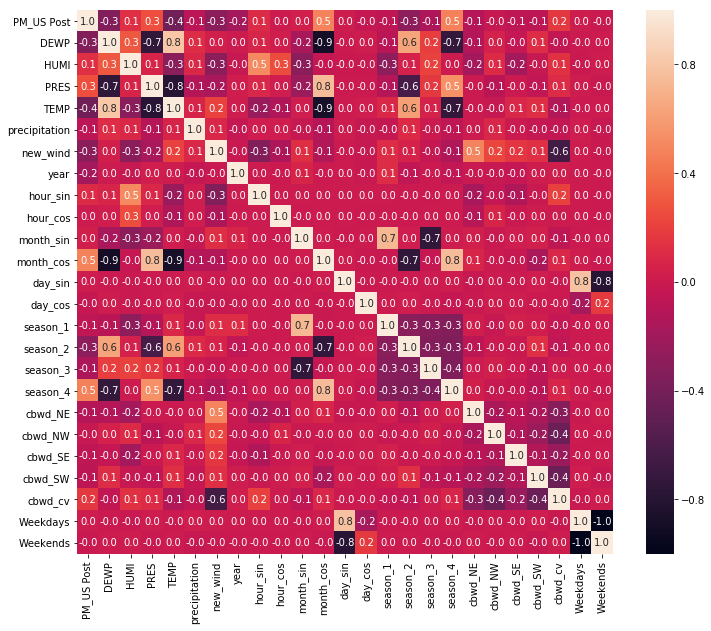

In [66]:
import seaborn as sns
corr = dataset_Chengdu_clean.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

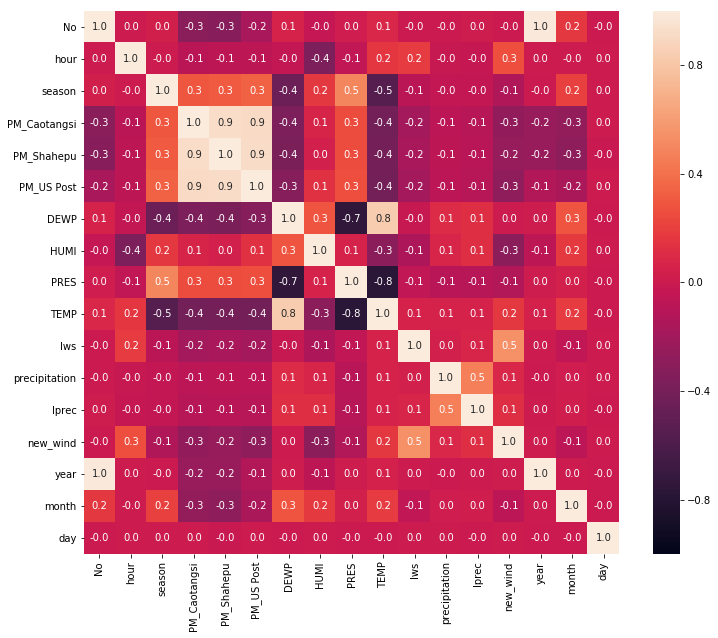

In [67]:
import seaborn as sns
corr = dataset_Chengdu.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

# ** Implementation **

In [25]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
from sklearn.cross_validation import train_test_split


In [26]:
# Load Chengdu dataset
Chengdu = pd.read_csv('dataset_Chengdu_clean.csv')
Chengdu = Chengdu.drop('Unnamed: 0', axis = 1)

# Success - Display the first five records
display(Chengdu.head(n=3))

# Total number of records
n_records = len(Chengdu["PM_US Post"])
print("Number of records for Chengdu: ", n_records)

,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,1,129.0,-4.0,64.42,1022.0,2.0,0.0,1.0,0.000000e+00,...,1.0,0,0,0,1,0,0,0,0,1
1,2013,1,135.0,-3.0,80.19,1022.0,0.0,0.0,0.0,2.588190e-01,...,1.0,0,0,0,1,0,0,0,0,1
2,2013,1,189.0,-5.0,42.10,1020.0,7.0,0.0,2.0,1.224647e-16,...,1.0,0,0,0,1,1,0,0,0,0


Number of records for Chengdu:  23097


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


def applyCV(name,estimator):
    # Construct the pipeline with a standard scaler and a small neural network
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append((name, estimator))
    model = Pipeline(estimators)

    # Split the data into features and target label

    features = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
    #features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
    X = Chengdu[features].values
    y = Chengdu['PM_US Post']

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold"
    # are mutually orthogonal.
    kfold = KFold(n_splits=5,  shuffle=True)

    print(estimators)

    print("**cross_val_score + KFold **")

    results_R2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print('CV Scoring Result: r2 : mean=',np.mean(results_R2),'std=',np.std(results_R2))
    #print(results_R2) 
    print("**************")
    
    results_MAE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print('CV Scoring Result: MAE : mean=',np.mean(results_MAE),'std=',np.std(results_MAE))
    #print(results_MAE)  
    print("**************")

    results_MSE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print('CV Scoring Result: MSE : mean=',np.mean(results_MSE),'std=',np.std(results_MSE))
    #print(results_MSE) 
    
    print("***********************************")

    print("**cross_validate**")
    
    scores = cross_validate(model, X, y, scoring=('r2'), cv = 5)
    print('CV Scoring Result: r2 : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_absolute_error'), cv = 5)
    print('CV Scoring Result: MAE : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_squared_error'), cv = 5)
    print('CV Scoring Result: MSE : mean=',np.mean(scores['test_score']))
    #print(scores) 
    print("-----------------------------------------------")

    
applyCV("LR",LinearRegression())
print("*******************************************")
applyCV("RF",RandomForestRegressor(n_estimators = 96))
print("*******************************************")
applyCV("ANN",MLPRegressor(hidden_layer_sizes= (128, 256)))
print("*******************************************")
applyCV("SVR",SVR(kernel='rbf'))


[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.3184181824081742 std= 0.005769313831801371
**************
CV Scoring Result: MAE : mean= -24.16996647581707 std= 0.23289540283535215
**************
CV Scoring Result: MSE : mean= -921.2870937816839 std= 9.084982249090103
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.20917523077327202
**************
CV Scoring Result: MAE : mean= -25.338142633057124
**************
CV Scoring Result: MSE : mean= -992.1984027823597
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impuri

In [27]:

features_ = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
#features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Features = Chengdu[features_].values
Target = Chengdu['PM_US Post']


# Saving feature names for later use
feature_list = list(Chengdu[features_])

display(Chengdu[features_].head(n=2))
display(Target.head(n=2))

,DEWP,HUMI,PRES,TEMP,new_wind,precipitation,hour_sin,hour_cos,month_sin,month_cos,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,season_1,season_2,season_3,season_4,year
0,-4.0,64.42,1022.0,2.0,1.0,0.0,0.000000,1.000000,0.0,1.0,0,0,0,0,1,0,0,0,1,2013
1,-3.0,80.19,1022.0,0.0,0.0,0.0,0.258819,0.965926,0.0,1.0,0,0,0,0,1,0,0,0,1,2013


0    129.0
1    135.0
Name: PM_US Post, dtype: float64

In [28]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.33, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

Linear_regression = LinearRegression()
start_Training_time = int(time() * 1000)
Linear_regression.fit(X_train, y_train)
end_Training_time = int(time() * 1000)

print( "Linear Regression: " )
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


predict = Linear_regression.predict(X_test)

r2 = r2_score(y_test, predict)
MSE =  mean_squared_error(y_test,predict)

print('Testing: ')
print ('Testing r2_score: ', round(r2, 5))
print('Testing MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predict)
print('MAE_score: ', round(MAE, 5))

# Calculate the absolute errors
errors = abs(predict - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Linear Regression: 
Training: 
Training took 11 ms
Testing: 
Testing r2_score:  0.41349
Testing MSE_score:  2081.37204
MAE_score:  33.3686
Mean Absolute Error: 33.37 degrees.
Accuracy: 40.18 %.


In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 96)

start_Training_time = int(time() * 1000)
rf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Random Forest Regressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


start_Testing_time = int(time() * 1000)
predictions = rf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', round(MAE, 5))


# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest Regressor: 
Training: 
Training took 6026 ms
Testing: 
Testing took 182 ms
r2_score:  0.742
MSE_score:  915.57337
MAE_score:  21.10675
Mean Absolute Error: 21.11 degrees.
Accuracy: 60.82 %.


In [109]:
rf1 = RandomForestRegressor(n_estimators = 96)

# Feature Scaling
#Sc_X1 = StandardScaler()
#CorrelatedFeaturesScaled = Sc_X1.fit_transform(Features)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf1, Features, Target, scoring=('r2'), cv = 5)
print(scores)  

{'fit_time': array([5.73860216, 5.58625913, 5.91751194, 6.11412406, 6.00829816]), 'score_time': array([0.06447601, 0.06234074, 0.05763817, 0.05621886, 0.07797766]), 'test_score': array([ 0.12053472,  0.157782  , -0.06686246,  0.15650944, -0.08000916]), 'train_score': array([0.94703448, 0.94603624, 0.95412321, 0.94897997, 0.94775011])}


In [10]:
# Saving feature names for later use
#feature_list = list(Features.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: month_cos            Importance: 0.15
Variable: PRES                 Importance: 0.14
Variable: DEWP                 Importance: 0.12
Variable: HUMI                 Importance: 0.11
Variable: new_wind             Importance: 0.08
Variable: TEMP                 Importance: 0.07
Variable: hour_sin             Importance: 0.06
Variable: hour_cos             Importance: 0.06
Variable: year                 Importance: 0.06
Variable: month_sin            Importance: 0.04
Variable: season_4             Importance: 0.03
Variable: precipitation        Importance: 0.02
Variable: cbwd_NE              Importance: 0.01
Variable: cbwd_NW              Importance: 0.01
Variable: cbwd_SW              Importance: 0.01
Variable: cbwd_cv              Importance: 0.01
Variable: season_1             Importance: 0.01
Variable: season_3             Importance: 0.01
Variable: cbwd_SE              Importance: 0.0
Variable: season_2             Importance: 0.0


In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes= (128, 256))
start_Training_time = int(time() * 1000)
mlp.fit(X_train,y_train)
end_Training_time = int(time() * 1000)

print('Neural Network / MLPRegressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

predictions = mlp.predict(X_test)

print('Testing: ')
r2 = r2_score(y_test,predictions)
print('r2_score: ', r2)
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', MSE)
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Neural Network / MLPRegressor: 
Training: 
Training took 28664 ms
Testing: 
r2_score:  0.6656155644919433
MSE_score:  1186.6500640898385
MAE_score:  24.641265789373936
Mean Absolute Error: 24.64 degrees.
Accuracy: 56.49 %.


In [33]:
from sklearn.svm import SVR

clf = SVR(kernel='rbf')
start_Training_time = int(time() * 1000)
clf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Support Vector Regression: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

start_Testing_time = int(time() * 1000)
predictions = clf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Support Vector Regression: 
Training: 
Training took 12770 ms
Testing: 
Testing took 4553 ms
r2_score:  0.40648
MSE_score:  2106.26567
MAE_score:  31.329999087591222
Mean Absolute Error: 31.33 degrees.
Accuracy: 48.1 %.
